In [1]:
import numpy as np
import os
import pysynphot as s
import pandas as pd
import matplotlib.pyplot as plt

/home/mldantas/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
spectrum          = '/home/mldantas/Dropbox/DoutoradoIAG/Challenge/Sanity_Check/Specs/0443.51873.152.txt'
jplus_good_filter = '/home/mldantas/Dropbox/DoutoradoIAG/Challenge/Filters/JPLUS_SDSS_filters/rSDSS_2cols.txt'
jplus_bad_filter  = '/home/mldantas/Dropbox/DoutoradoIAG/Challenge/Filters/JPLUS_SDSS_filters/iSDSS_2cols.txt'

In [3]:
wavelength = np.loadtxt(spectrum, usecols=[0])
f_lambda   = np.loadtxt(spectrum, usecols=[1])

In [4]:
# Setting the T80 M1 effective area in cm^2 ------------------------------------------------------------------------
s.setref(area=4400)

In [5]:
sdss_spectrum = s.FileSpectrum(spectrum)

In [6]:
jplus_good_bandpass = s.FileBandpass(jplus_good_filter)

In [7]:
jplus_bad_bandpass = s.FileBandpass(jplus_bad_filter)

In [8]:
photometry_good = s.Observation(sdss_spectrum, jplus_good_bandpass, binset=np.arange(3000, 11000), 
                                             force='extrap')
photometry_good_flam = photometry_good.effstim('flam')
lambda_eff_good = photometry_good.efflam()
print photometry_good_flam
print lambda_eff_good

4.93492556991e-16
6333.90457903


In [9]:
photometry_bad = s.Observation(sdss_spectrum, jplus_bad_bandpass, binset=np.arange(3000, 11000), 
                                             force='extrap')
photometry_bad_flam = photometry_bad.effstim('flam')
lambda_eff_bad = photometry_bad.efflam()
print photometry_bad_flam
print lambda_eff_bad

3.85719445784e-16
7516.30367715


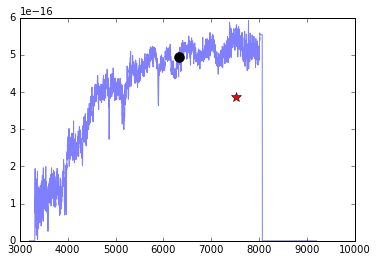

In [10]:
plot01 = plt.plot(wavelength, f_lambda, '-', alpha=0.5)
plot02 = plt.plot(lambda_eff_good, photometry_good_flam, 'o', color='black', markersize=10)
plot02 = plt.plot(lambda_eff_bad, photometry_bad_flam, '*', color='red', markersize=10 )
plt.show()